In [56]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

df = pd.read_csv("/Users/jacksoler1/Projects/project1_group4/merged_final.csv", low_memory=False)
df.head()


,Unnamed: 0,unitid,wmearn_unitid,geo_fips,instnm.x,stabbr.x,geo_stabbr,linkedin_flagd,pginmsa,pginstate,...,ofgrt_a,floan_p,floan_a,oloan_p,oloan_a,undergrad_tot,TexERU,hdi_unitid,sevcrime_unitid,wminc2020st_unitid
0,1,100654,46951.67568,12.0,Alabama A & M University,AL,FL,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.12353
1,2,100654,46951.67568,25.0,Alabama A & M University,AL,MA,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.12353
2,3,100654,46951.67568,48.0,Alabama A & M University,AL,TX,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.12353
3,4,100654,46951.67568,36.0,Alabama A & M University,AL,NY,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.12353
4,5,100654,46951.67568,24.0,Alabama A & M University,AL,MD,1,38.629493,54.937857,...,2017.0,81.0,7391.0,2.0,6027.0,4210,0,0.89042,213.067857,18846.12353


In [57]:
df.columns = df.columns.str.strip()
columns_to_keep = ['Unnamed: 0', 'instnm.x', 'avgmktwage', 'tuition2', 'tuition3', 'tuition6', 'tuition7']
df = df.loc[:, columns_to_keep]
df = df.rename(columns={'avgmktwage': 'Average Wage','instnm.x':'Institution'})
# Display the first few rows of the filtered DataFrame
df.head()

,Unnamed: 0,Institution,Average Wage,tuition2,tuition3,tuition6,tuition7
0,1,Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0
1,2,Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0
2,3,Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0
3,4,Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0
4,5,Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0


In [58]:
grouped_df = df.groupby('Institution').agg({'Average Wage': 'mean','tuition2': 'mean','tuition3': 'mean','tuition6': 'mean','tuition7': 'mean'})
grouped_df['tuition2'] = grouped_df['tuition2'].fillna(0)
grouped_df['tuition3'] = grouped_df['tuition3'].fillna(0)
grouped_df['tuition6'] = grouped_df['tuition6'].fillna(0)
grouped_df['tuition7'] = grouped_df['tuition7'].fillna(0)

# Display the first few rows of the grouped DataFrame
grouped_df.head(10)

,Average Wage,tuition2,tuition3,tuition6,tuition7
Institution,,,,,
Abilene Christian University,23.045357,30780.0,30780.0,19116.0,19116.0
Adams State College,22.575907,5448.0,15960.0,4428.0,10368.0
Adelphi University,30.468930,32380.0,32380.0,35800.0,35800.0
Adrian College,22.834435,32810.0,32810.0,15190.0,15190.0
Agnes Scott College,25.567225,36996.0,36996.0,0.0,0.0
Alabama A & M University,23.172288,7770.0,15540.0,7074.0,14148.0
Alabama State University,21.799889,6936.0,13872.0,8232.0,16464.0
Alaska Pacific University,25.153450,19500.0,19500.0,11700.0,11700.0
Albany College of Pharmacy and Health Sciences,24.238943,30300.0,30300.0,20520.0,20520.0


In [59]:
# Create a new column 'tuition' by summing the tuition columns
grouped_df['Tuition'] = grouped_df['tuition2'] + grouped_df['tuition3'] + grouped_df['tuition6'] + grouped_df['tuition7']

# Drop the individual tuition columns
grouped_df = grouped_df.drop(['tuition2', 'tuition3', 'tuition6', 'tuition7'], axis=1)


grouped_df.head(10)

,Average Wage,Tuition
Institution,,
Abilene Christian University,23.045357,99792.0
Adams State College,22.575907,36204.0
Adelphi University,30.468930,136360.0
Adrian College,22.834435,96000.0
Agnes Scott College,25.567225,73992.0
Alabama A & M University,23.172288,44532.0
Alabama State University,21.799889,45504.0
Alaska Pacific University,25.153450,62400.0
Albany College of Pharmacy and Health Sciences,24.238943,101640.0


In [60]:
print(grouped_df.dtypes)
print(grouped_df['Tuition'].describe())

Average Wage    float64
Tuition         float64
dtype: object
count      1581.000000
mean      72283.109846
std       38179.747400
min           0.000000
25%       45110.000000
50%       67030.000000
75%       89840.000000
max      215858.000000
Name: Tuition, dtype: float64


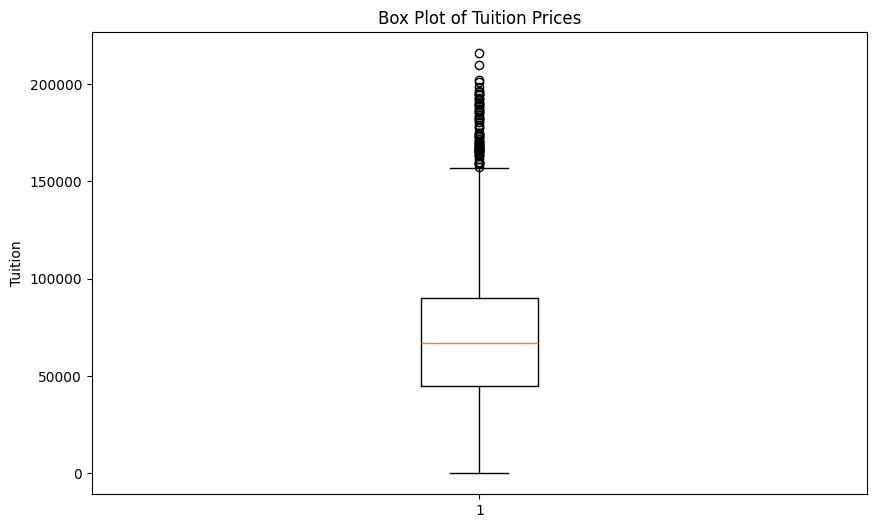

In [61]:
# Create a box plot of the 'Tuition' column
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_df['Tuition'])  # Provide the Tuition data as a list

# Add title and labels
plt.title('Box Plot of Tuition Prices')
plt.ylabel('Tuition')
plt.show()

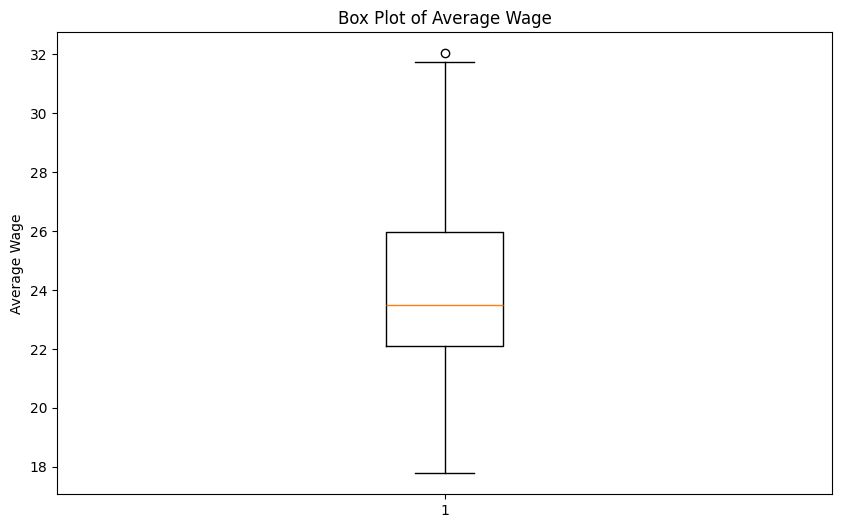

In [65]:
# Create a box plot of the 'Tuition' column
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_df['Average Wage'])  # Provide the Tuition data as a list

# Add title and labels
plt.title('Box Plot of Average Wage')
plt.ylabel('Average Wage')
plt.show()

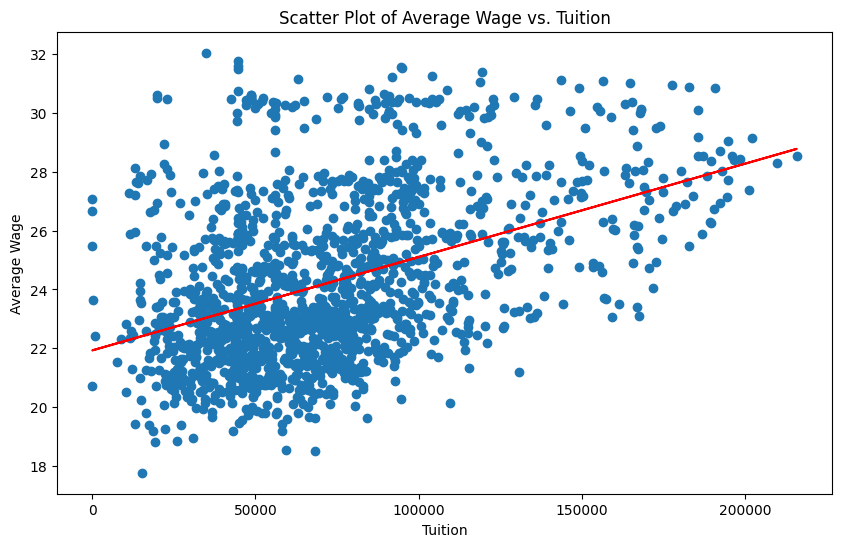

In [62]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['Tuition'], grouped_df['Average Wage'])

# Calculate the linear regression line
slope, intercept, _, _, _ = st.linregress(grouped_df['Tuition'], grouped_df['Average Wage'])

# Plot the linear regression line
x_vals = grouped_df['Tuition']
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Linear regression: y = {slope:.2f}x + {intercept:.2f}')


# Add title and labels
plt.title('Scatter Plot of Average Wage vs. Tuition')
plt.xlabel('Tuition')
plt.ylabel('Average Wage')

# Show the plot
plt.show()

In [63]:
grouped_df['Earnings After 10 Years'] = grouped_df['Average Wage'] * 20800
grouped_df['Earnings After 10 Years Including Tuition'] = grouped_df['Earnings After 10 Years'] - grouped_df['Tuition']

grouped_df = grouped_df.round(2)
grouped_df.head()

,Average Wage,Tuition,Earnings After 10 Years,Earnings After 10 Years Including Tuition
Institution,,,,
Abilene Christian University,23.05,99792.0,479343.44,379551.44
Adams State College,22.58,36204.0,469578.86,433374.86
Adelphi University,30.47,136360.0,633753.74,497393.74
Adrian College,22.83,96000.0,474956.24,378956.24
Agnes Scott College,25.57,73992.0,531798.28,457806.28


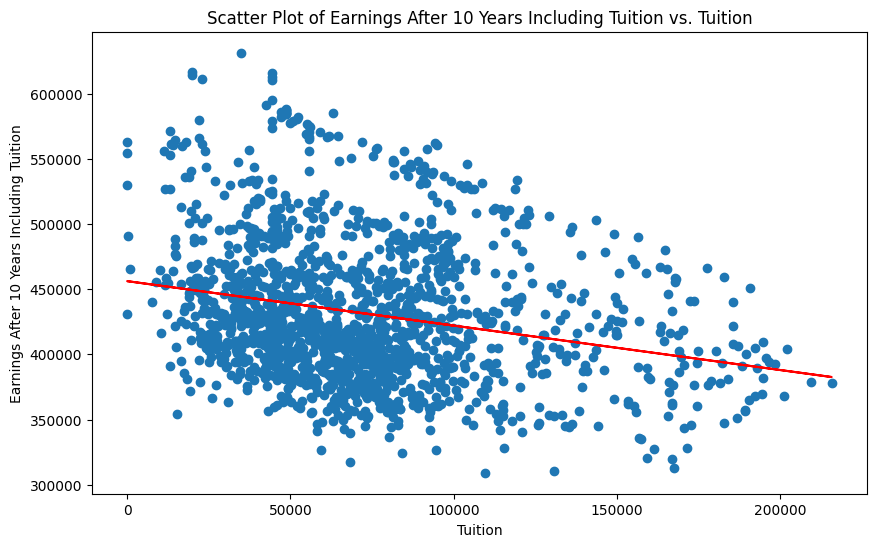

In [64]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['Tuition'], grouped_df['Earnings After 10 Years Including Tuition'])

# Calculate the linear regression line
slope, intercept, _, _, _ = st.linregress(grouped_df['Tuition'], grouped_df['Earnings After 10 Years Including Tuition'])

# Plot the linear regression line
x_vals = grouped_df['Tuition']
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Linear regression: y = {slope:.2f}x + {intercept:.2f}')


# Add title and labels
plt.title('Scatter Plot of Earnings After 10 Years Including Tuition vs. Tuition')
plt.xlabel('Tuition')
plt.ylabel('Earnings After 10 Years Including Tuition')

# Show the plot
plt.show()